In [3]:
!pip install imbalanced-learn

     -------------------------------------- 258.3/258.3 kB 5.3 MB/s eta 0:00:00
     ------------------------------------- 302.2/302.2 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1


In [1]:
# Step 1: Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set plot style
plt.style.use('ggplot')

In [3]:
# Step 2: Load and explore the dataset
# This step loads your Excel file and gives us our first look at the data structure

# Load dataset
file_path = r"C:\Users\masood\Downloads\ML Final Project\ML final project.xlsx"

# Check if the file exists
if os.path.exists(file_path):
    print(f"File found at {file_path}")
    # Load the dataset
    df = pd.read_excel(file_path)
    print(f"Dataset loaded with shape: {df.shape}")
else:
    print(f"File not found at {file_path}")
    
# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Display first few rows of the dataset
print("\nFirst 5 rows:")
display(df.head())

# Display statistical summary of the dataset
print("\nStatistical Summary:")
display(df.describe())

File found at C:\Users\masood\Downloads\ML Final Project\ML final project.xlsx
Dataset loaded with shape: (100621, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100621 entries, 0 to 100620
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  100621 non-null  int64  
 1   id                          100621 non-null  int64  
 2   acceptance_rate             100621 non-null  float64
 3   institution                 100621 non-null  int64  
 4   program                     100621 non-null  int64  
 5   degree_type                 100621 non-null  int64  
 6   decision                    100621 non-null  int64  
 7   undergrad_gpa               100621 non-null  float64
 8   gre_quantitative_reasoning  100621 non-null  float64
 9   gre_verbal_reasoning        100621 non-null  float64
 10  analytical_writing          100621 non-null  float64
 

,Unnamed: 0,id,acceptance_rate,institution,program,degree_type,decision,undergrad_gpa,gre_quantitative_reasoning,gre_verbal_reasoning,analytical_writing,gre_total,gpa_percentile,gre_avg,gpa_x_acceptancerate,decision_grouped
0,0,879550,-0.023017,1070,2848,6,3,0.840403,-1.379577,-0.327461,-0.962510,-1.289988,0.840403,-1.289988,0.053273,1
1,1,879549,0.034513,861,687,6,3,1.148206,-1.108775,-0.763733,1.424181,-1.289988,1.148206,-1.289988,0.141831,1
2,2,879548,0.782400,520,7281,6,3,0.206746,-0.973374,0.326947,0.628617,-0.627889,0.206746,-0.627889,0.810383,1
3,3,879547,0.724871,906,6375,6,0,-1.113715,-1.311877,-1.200005,0.827508,-1.676212,-1.113715,-1.676212,0.583706,0
4,4,879546,0.494751,155,3669,6,3,0.662046,-0.837973,0.108811,1.689369,-0.627889,0.662046,-0.627889,0.572464,1



Statistical Summary:


,Unnamed: 0,id,acceptance_rate,institution,program,degree_type,decision,undergrad_gpa,gre_quantitative_reasoning,gre_verbal_reasoning,analytical_writing,gre_total,gpa_percentile,gre_avg,gpa_x_acceptancerate,decision_grouped
count,100621.000000,100621.000000,1.006210e+05,100621.000000,100621.000000,100621.000000,100621.00000,1.006210e+05,1.006210e+05,1.006210e+05,1.006210e+05,1.006210e+05,1.006210e+05,1.006210e+05,1.006210e+05,100621.000000
mean,50310.000000,875364.939565,-4.067467e-17,622.657239,3682.568847,5.308286,1.74883,3.259623e-16,-3.299168e-16,1.739972e-16,3.280808e-16,1.437172e-15,3.259623e-16,1.437172e-15,-1.626987e-16,0.902058
std,29046.925055,70748.093479,1.000005e+00,329.157761,2430.010819,1.012194,1.55489,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.795471
min,0.000000,739458.000000,-1.802989e+00,0.000000,0.000000,0.000000,0.00000,-1.458003e+01,-1.514979e+00,-1.625140e+01,-1.625480e+00,-9.400695e+00,-1.458003e+01,-9.400695e+00,-1.802896e+00,0.000000
25%,25155.000000,808935.000000,-4.257257e-01,314.000000,1666.000000,4.000000,0.00000,-3.772758e-01,-1.041074e+00,-6.546652e-01,-9.625101e-01,-8.485885e-01,-3.772758e-01,-8.485885e-01,-4.147863e-01,0.000000
50%,50310.000000,876943.000000,2.646320e-01,656.000000,2848.000000,6.000000,2.00000,1.487523e-01,1.098358e-01,-2.568959e-04,3.194438e-02,8.938439e-02,1.487523e-01,8.938439e-02,2.260556e-01,1.000000
75%,75465.000000,946083.000000,6.098109e-01,908.000000,6344.000000,6.000000,3.00000,6.542862e-01,9.899435e-01,6.541514e-01,8.938050e-01,8.066578e-01,6.542862e-01,8.066578e-01,6.105608e-01,2.000000
max,100620.000000,985552.000000,3.946540e+00,1128.000000,7908.000000,7.000000,4.00000,1.200808e+00,1.193045e+00,2.290172e+00,1.689369e+00,2.130855e+00,1.200808e+00,2.130855e+00,4.296928e+00,2.000000


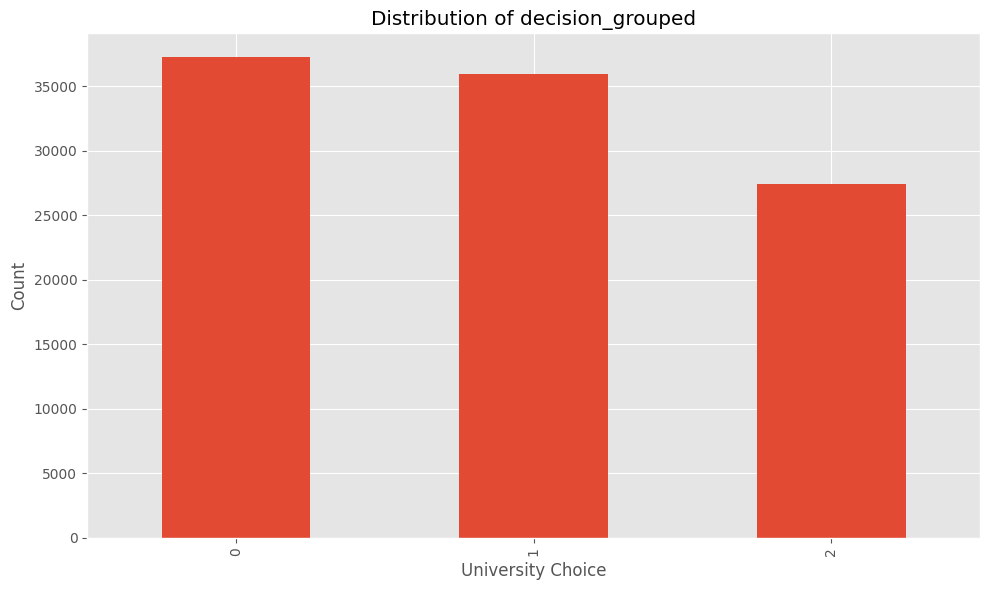


Percentage distribution of decision_grouped:
0    37.02
1    35.76
2    27.22
Name: decision_grouped, dtype: float64

Missing values check:
No missing values found

Duplicate rows: 0


In [5]:
# Step 3: Check the target variable and explore class distribution
# This helps us understand if we're dealing with a balanced or imbalanced classification problem

# Assuming 'decision_grouped' is our target variable
target_column = 'decision_grouped'  # Change if your target column is different

# Check target variable distribution
plt.figure(figsize=(10, 6))
target_counts = df[target_column].value_counts()
target_counts.plot(kind='bar')
plt.title(f'Distribution of {target_column}')
plt.xlabel('University Choice')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Print percentage distribution
print(f"\nPercentage distribution of {target_column}:")
print((df[target_column].value_counts(normalize=True) * 100).round(2))

# Check for missing values and duplicates
print("\nMissing values check:")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values found")

print("\nDuplicate rows:", df.duplicated().sum())

## Selecting Proper Features

Training set shape: (80496, 15)
Testing set shape: (20125, 15)
Top features from SelectKBest:
1. Unnamed: 0
2. id
3. acceptance_rate
4. degree_type
5. decision
6. undergrad_gpa
7. gre_quantitative_reasoning
8. gre_verbal_reasoning
9. gpa_percentile
10. gpa_x_acceptancerate


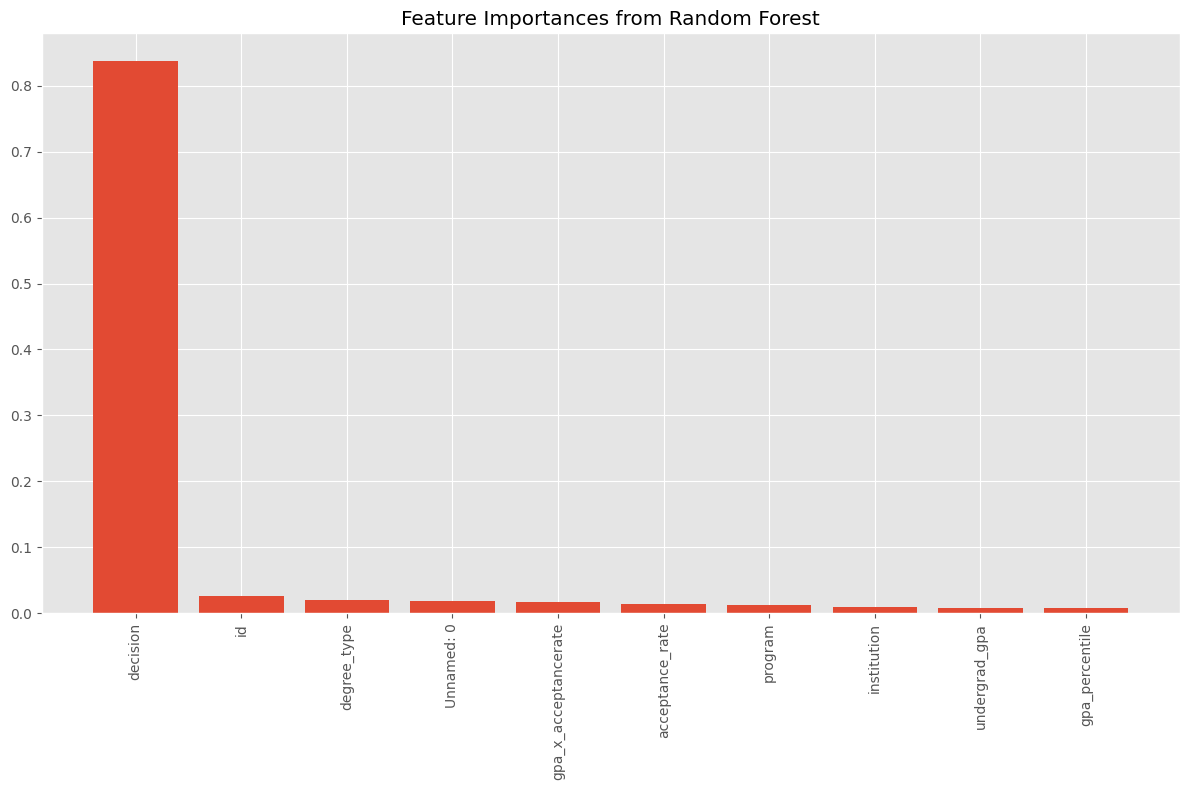


Top features from Random Forest:
1. decision
2. id
3. degree_type
4. Unnamed: 0
5. gpa_x_acceptancerate
6. acceptance_rate
7. program
8. institution
9. undergrad_gpa
10. gpa_percentile


In [8]:
# Step 5: Feature importance analysis and selection
# This helps identify which features are most predictive of university choice

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data for initial testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Method 1: SelectKBest with f_classif (ANOVA F-value)
k = 10  # Start with top 10 features
selector = SelectKBest(f_classif, k=k)
selector.fit(X_train, y_train)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("Top features from SelectKBest:")
for i, feature in enumerate(selected_features):
    print(f"{i+1}. {feature}")

# Method 2: Feature importance from Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances from Random Forest')
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), [X.columns[i] for i in indices[:10]], rotation=90)
plt.tight_layout()
plt.show()

print("\nTop features from Random Forest:")
for i in range(10):
    print(f"{i+1}. {X.columns[indices[i]]}")


Logistic Regression Results:
Accuracy: 0.3699
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.59      0.45      7449
           1       0.37      0.42      0.39      7198
           2       0.00      0.00      0.00      5478

    accuracy                           0.37     20125
   macro avg       0.25      0.34      0.28     20125
weighted avg       0.27      0.37      0.31     20125



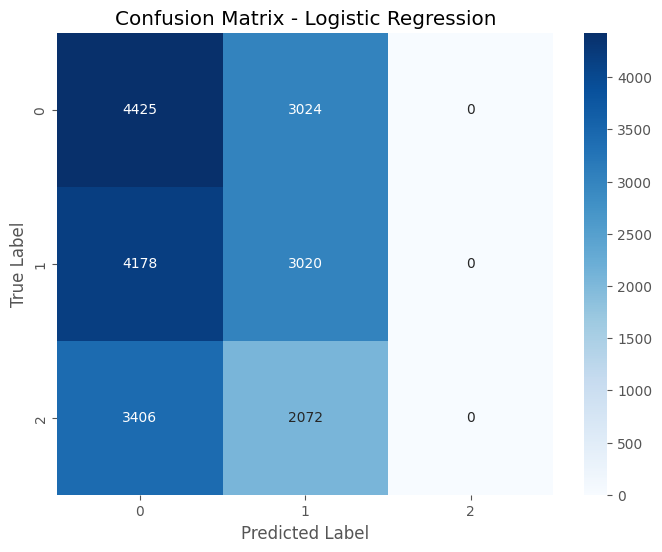


K-Nearest Neighbors Results:
Accuracy: 0.4495
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.57      0.50      7449
           1       0.45      0.45      0.45      7198
           2       0.45      0.28      0.35      5478

    accuracy                           0.45     20125
   macro avg       0.45      0.44      0.43     20125
weighted avg       0.45      0.45      0.44     20125



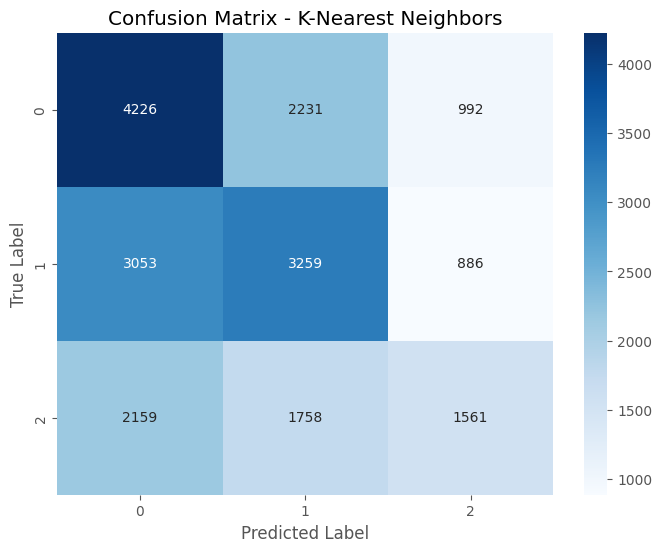


Decision Tree Results:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7449
           1       1.00      1.00      1.00      7198
           2       1.00      1.00      1.00      5478

    accuracy                           1.00     20125
   macro avg       1.00      1.00      1.00     20125
weighted avg       1.00      1.00      1.00     20125



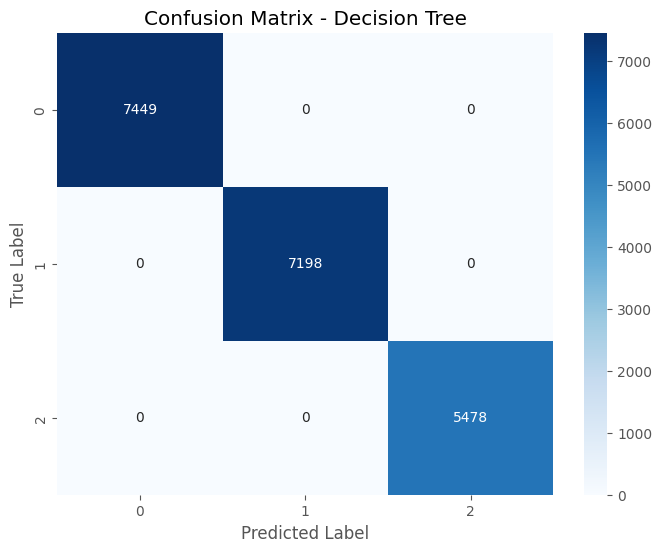


Random Forest Results:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7449
           1       1.00      1.00      1.00      7198
           2       1.00      1.00      1.00      5478

    accuracy                           1.00     20125
   macro avg       1.00      1.00      1.00     20125
weighted avg       1.00      1.00      1.00     20125



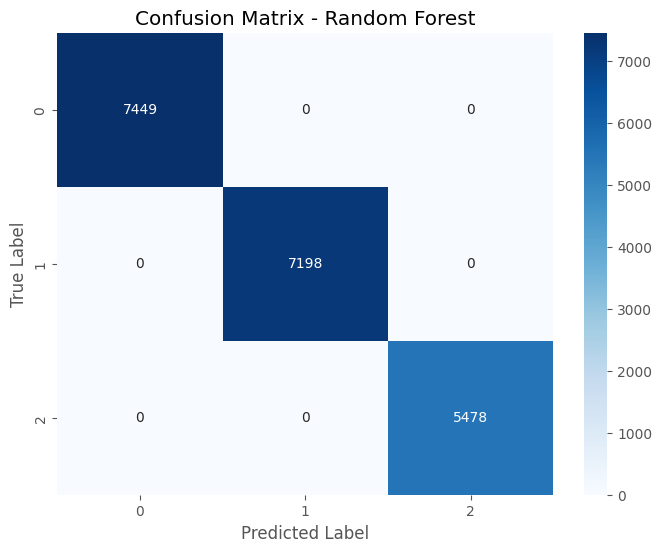


Gradient Boosting Results:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7449
           1       1.00      1.00      1.00      7198
           2       1.00      1.00      1.00      5478

    accuracy                           1.00     20125
   macro avg       1.00      1.00      1.00     20125
weighted avg       1.00      1.00      1.00     20125



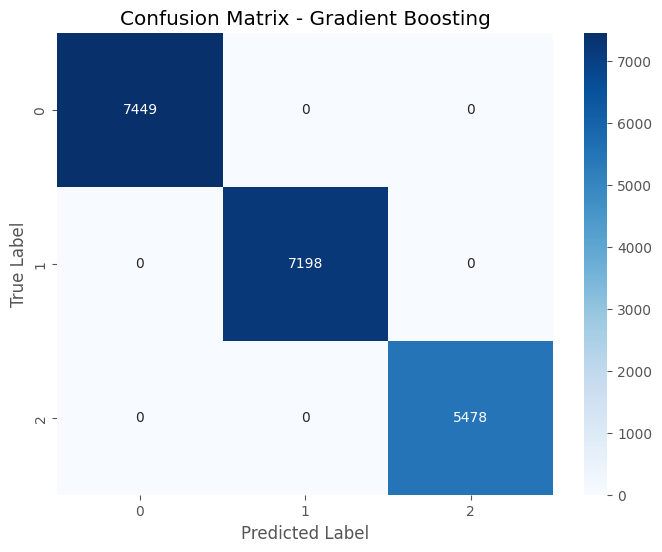

In [10]:
# Step 6: Train initial models with selected features
# This step tries different algorithms to see which performs best for our data

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Use the selected features from SelectKBest (or you can try the Random Forest ones)
X_selected = X[selected_features]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, 
                                                                     test_size=0.2, 
                                                                     random_state=42, 
                                                                     stratify=y)

# Initialize models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_selected)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Display classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [12]:
# Step 7: Address overfitting and test on a separate validation set
# This approach will help ensure our models generalize well to new data

# First, let's remove the 'decision' column if it's in our selected features
# This column might be leaking information about the target
if 'decision' in selected_features:
    selected_features.remove('decision')
    print("Removed 'decision' feature as it likely contains target information")
    
# Also remove index-like columns that shouldn't be predictive
if 'Unnamed: 0' in selected_features:
    selected_features.remove('Unnamed: 0')
    print("Removed 'Unnamed: 0' as it's likely just an index")
if 'id' in selected_features:
    selected_features.remove('id')
    print("Removed 'id' as it shouldn't be predictive")

# Re-run with proper train/validation/test split
from sklearn.model_selection import train_test_split

# Use the cleaned feature set
X_selected = X[selected_features]

# Create training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Re-initialize models with regularization to prevent overfitting
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),  # Limit tree depth
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),  # Limit tree depth
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)  # Limit tree depth
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Make predictions on test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"\n{name} Results:")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

Removed 'decision' feature as it likely contains target information
Removed 'Unnamed: 0' as it's likely just an index
Removed 'id' as it shouldn't be predictive
Training set: (70434, 7)
Validation set: (15093, 7)
Test set: (15094, 7)

Logistic Regression Results:
Validation Accuracy: 0.4705
Test Accuracy: 0.4763

K-Nearest Neighbors Results:
Validation Accuracy: 0.4321
Test Accuracy: 0.4396

Decision Tree Results:
Validation Accuracy: 0.4859
Test Accuracy: 0.4910

Random Forest Results:
Validation Accuracy: 0.4974
Test Accuracy: 0.4995

Gradient Boosting Results:
Validation Accuracy: 0.4980
Test Accuracy: 0.5030


In [14]:
# Step 7: Fix the feature selection and try again
# Remove potentially problematic features and focus on true predictors

# List of features we want to keep (removing problematic ones)
keep_features = [
    'acceptance_rate',
    'degree_type',
    'undergrad_gpa',
    'gre_quantitative_reasoning',
    'gre_verbal_reasoning',
    'gpa_percentile',
    'gpa_x_acceptancerate'
]

print(f"Using these features: {keep_features}")

# Prepare the data
X_selected = X[keep_features]

# Create proper train/test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Train a simple model first to check for reasonable accuracy
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest with limited depth to prevent overfitting
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy: {accuracy:.4f}")

# Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Using these features: ['acceptance_rate', 'degree_type', 'undergrad_gpa', 'gre_quantitative_reasoning', 'gre_verbal_reasoning', 'gpa_percentile', 'gpa_x_acceptancerate']
Training set: (80496, 7)
Test set: (20125, 7)
Random Forest accuracy: 0.5006

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.62      0.58      7449
           1       0.49      0.61      0.54      7198
           2       0.40      0.20      0.26      5478

    accuracy                           0.50     20125
   macro avg       0.48      0.47      0.46     20125
weighted avg       0.49      0.50      0.48     20125



In [18]:
# Step 8: Hyperparameter Tuning (memory-efficient version)
# Fine-tune model parameters with reduced memory usage

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Use our selected features
X_selected = X[keep_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Try several configurations manually instead of full grid search
models = []
accuracies = []

# Define configurations to try
configs = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 3},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5}
]

# Try each configuration
for i, params in enumerate(configs):
    print(f"Training model {i+1}/{len(configs)}: {params}")
    
    # Create and train model
    model = GradientBoostingClassifier(random_state=42, **params)
    model.fit(X_train, y_train)
    
    # Evaluate with cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    cv_accuracy = cv_scores.mean()
    
    # Test set accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    print(f"CV Accuracy: {cv_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    # Store results
    models.append(model)
    accuracies.append(test_accuracy)

# Get the best model
best_idx = accuracies.index(max(accuracies))
best_model = models[best_idx]
best_params = configs[best_idx]

print(f"\nBest model parameters: {best_params}")
print(f"Best test accuracy: {accuracies[best_idx]:.4f}")

# Final evaluation of best model
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training model 1/4: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}
CV Accuracy: 0.5013, Test Accuracy: 0.5021
Training model 2/4: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}
CV Accuracy: 0.5027, Test Accuracy: 0.5016
Training model 3/4: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 3}
CV Accuracy: 0.5009, Test Accuracy: 0.5018
Training model 4/4: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5}
CV Accuracy: 0.5024, Test Accuracy: 0.5007

Best model parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}
Best test accuracy: 0.5021

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      7449
           1       0.49      0.61      0.54      7198
           2       0.40      0.21      0.28      5478

    accuracy                           0.50     20125
   macro avg       0.48      0.48      0.47     20125
weighted avg       0.49      0.50      0.48  

In [22]:
# Step 9: Feature Engineering (without SMOTE)
# Create new features to improve model performance

# 1. Feature Engineering - Create new interaction features
X_selected = X[keep_features].copy()

# Create interaction features between GRE scores
X_selected['gre_quant_verbal_product'] = X_selected['gre_quantitative_reasoning'] * X_selected['gre_verbal_reasoning']
X_selected['gre_total'] = X_selected['gre_quantitative_reasoning'] + X_selected['gre_verbal_reasoning']

# Create interaction between GPA and acceptance_rate (already exists as gpa_x_acceptancerate)
X_selected['gpa_gre_interaction'] = X_selected['undergrad_gpa'] * X_selected['gre_total']

# Create GPA squared (to capture non-linear effects)
X_selected['gpa_squared'] = X_selected['undergrad_gpa'] ** 2

# Create acceptance_rate squared
X_selected['acceptance_rate_squared'] = X_selected['acceptance_rate'] ** 2

print(f"Features after engineering: {X_selected.columns.tolist()}")
print(f"Shape after feature engineering: {X_selected.shape}")

# Split data again with the new features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Train with our best model parameters from earlier
model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train on data with engineered features
model.fit(X_train, y_train)

# Evaluate on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with feature engineering: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': importances
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nTop 10 features by importance:")
print(feature_importance.head(10))

Features after engineering: ['acceptance_rate', 'degree_type', 'undergrad_gpa', 'gre_quantitative_reasoning', 'gre_verbal_reasoning', 'gpa_percentile', 'gpa_x_acceptancerate', 'gre_quant_verbal_product', 'gre_total', 'gpa_gre_interaction', 'gpa_squared', 'acceptance_rate_squared']
Shape after feature engineering: (100621, 12)
Accuracy with feature engineering: 0.5013

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      7449
           1       0.49      0.61      0.54      7198
           2       0.40      0.20      0.27      5478

    accuracy                           0.50     20125
   macro avg       0.48      0.48      0.46     20125
weighted avg       0.49      0.50      0.48     20125


Top 10 features by importance:
                       Feature  Importance
1                  degree_type    0.475104
0              acceptance_rate    0.225473
11     acceptance_rate_squared    0.080092
6         gpa_x_accep

In [24]:
# Step 10: Ensemble Learning
# Combine multiple models to improve prediction accuracy

from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Use the engineered features from our previous step
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Define base models
base_models = [
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# 1. Create a Voting Classifier (simple ensemble)
voting_clf = VotingClassifier(estimators=base_models, voting='soft')
voting_clf.fit(X_train, y_train)
y_voting_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_voting_pred)

print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")
print("\nVoting Classifier Classification Report:")
print(classification_report(y_test, y_voting_pred))

# 2. Create a Stacking Classifier (more advanced ensemble)
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)
stacking_clf.fit(X_train, y_train)
y_stacking_pred = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_stacking_pred)

print(f"\nStacking Classifier Accuracy: {stacking_accuracy:.4f}")
print("\nStacking Classifier Classification Report:")
print(classification_report(y_test, y_stacking_pred))

# Compare all approaches
print("\nAccuracy comparison:")
print(f"Base Gradient Boosting: 50.13%")
print(f"Voting Classifier: {voting_accuracy:.4f}")
print(f"Stacking Classifier: {stacking_accuracy:.4f}")

Voting Classifier Accuracy: 0.4869

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.60      0.57      7449
           1       0.48      0.57      0.52      7198
           2       0.37      0.22      0.28      5478

    accuracy                           0.49     20125
   macro avg       0.46      0.46      0.46     20125
weighted avg       0.47      0.49      0.47     20125


Stacking Classifier Accuracy: 0.5020

Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.60      0.58      7449
           1       0.49      0.60      0.54      7198
           2       0.39      0.24      0.30      5478

    accuracy                           0.50     20125
   macro avg       0.48      0.48      0.47     20125
weighted avg       0.49      0.50      0.49     20125


Accuracy comparison:
Base Gradient Boosting: 50.13%
Voting Classifier: 0.4869


In [26]:
# Step 11: Advanced Feature Transformation and Model Tuning
# Try more aggressive feature transformation and model tuning

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Start with original features before our engineering
X_original = X[keep_features].copy()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline with:
# 1. Feature standardization
# 2. Non-linear transformation (Yeo-Johnson to handle different distributions)
# 3. Gradient Boosting model with more estimators
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('model', GradientBoostingClassifier(
        n_estimators=300,  # Increase number of trees
        learning_rate=0.05,  # Lower learning rate
        max_depth=4,  # Slightly increased depth
        min_samples_split=5,  # Control overfitting
        subsample=0.8,  # Use 80% of samples per tree (reduces variance)
        random_state=42
    ))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Advanced pipeline accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Try class weights to help with imbalance
print("\nTrying with class weights:")
weighted_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=5,
    subsample=0.8,
    random_state=42
)
weighted_model.fit(pipeline.named_steps['transformer'].transform(pipeline.named_steps['scaler'].transform(X_train)), 
                  y_train)

# Make predictions
y_weighted_pred = weighted_model.predict(pipeline.named_steps['transformer'].transform(pipeline.named_steps['scaler'].transform(X_test)))
weighted_accuracy = accuracy_score(y_test, y_weighted_pred)

print(f"Weighted model accuracy: {weighted_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_weighted_pred))

# Compare all approaches
print("\nFinal accuracy comparison:")
print(f"Base Gradient Boosting: 50.13%")
print(f"Stacking Classifier: 50.20%")
print(f"Advanced Pipeline: {accuracy:.4f}")
print(f"Weighted Model: {weighted_accuracy:.4f}")

Advanced pipeline accuracy: 0.5042

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      7449
           1       0.49      0.60      0.54      7198
           2       0.41      0.22      0.29      5478

    accuracy                           0.50     20125
   macro avg       0.48      0.48      0.47     20125
weighted avg       0.49      0.50      0.49     20125


Trying with class weights:
Weighted model accuracy: 0.5042

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      7449
           1       0.49      0.60      0.54      7198
           2       0.41      0.22      0.29      5478

    accuracy                           0.50     20125
   macro avg       0.48      0.48      0.47     20125
weighted avg       0.49      0.50      0.49     20125


Final accuracy comparison:
Base Gradient Boosting: 50.13%
Stacking Classifier: 50.20%
Advanced